# Split-Apply-Combine and Summarizing Relationships between Categorical and Quantitative Variables

In this notebook you will redo some of the exercises you have already done. **For all of the exercises in this notebook you should use `groupby` whenever possible to streamline the code.**

In [2]:
import pandas as pd

## Titanic

Recall the Titanic data set where we witnessed a Simpson's paradox when comparing the survival rates of crew members and passengers.

In [3]:
df_titanic = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/titanic.csv")

def class_to_type(c):
  if c in ["1st", "2nd", "3rd"]:
    return "passenger"
  else:
    return "crew"

df_titanic["type"] = df_titanic["class"].map(class_to_type)

df_titanic

,name,gender,age,class,embarked,country,ticketno,fare,survived,pclass,crew,type
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0,3.0,NaN,passenger
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0,3.0,NaN,passenger
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1,3.0,NaN,passenger
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1,3.0,NaN,passenger
...,...,...,...,...,...,...,...,...,...,...,...,...
2202,"Wynn, Mr. Walter",male,41.0,deck crew,B,England,NaN,NaN,1,NaN,deck crew,crew
2203,"Yearsley, Mr. Harry",male,40.0,victualling crew,S,England,NaN,NaN,1,NaN,victualling crew,crew
2204,"Young, Mr. Francis James",male,32.0,engineering crew,S,England,NaN,NaN,0,NaN,engineering crew,crew
2205,"Zanetti, Sig. Minio",male,20.0,restaurant staff,S,England,NaN,NaN,0,NaN,restaurant staff,crew


1\. Compare the proportion of passengers who survived and the proportion of crew members who survived. Do this by creating a Series or DataFrame that contains this information. Hint: you should not have to divide at all.

In [4]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_titanic.groupby("type")["survived"].mean()

type
crew         0.237079
passenger    0.379651
Name: survived, dtype: float64

2\. Compare the proportion of passengers who survived and the proportion of crew members who survived *among both females and males*. Do this by creating a Series or DataFrame that contains this information. Hint: you should not have to divide at all.

In [5]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_titanic.groupby(["gender", "type"])["survived"].mean()

gender  type     
female  crew         0.869565
        passenger    0.727468
male    crew         0.220300
        passenger    0.189189
Name: survived, dtype: float64

## Ames Housing data

In [6]:
df_ames = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/AmesHousing.txt", sep="\t")
df_ames

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,2926,923275080,80,RL,37.0,7937,Pave,NaN,IR1,Lvl,...,0,NaN,GdPrv,NaN,0,3,2006,WD,Normal,142500
2926,2927,923276100,20,RL,NaN,8885,Pave,NaN,IR1,Low,...,0,NaN,MnPrv,NaN,0,6,2006,WD,Normal,131000
2927,2928,923400125,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,132000
2928,2929,924100070,20,RL,77.0,10010,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2006,WD,Normal,170000


1\. Create a data frame with one row for each neighbood and columns for the mean and SD of lot area for the neighborhood. Hint: use `agg`.

In [38]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_neighborhood = df_ames.groupby("Neighborhood")["Lot Area"].agg(["mean", "std"])
df_neighborhood

,mean,std
Neighborhood,,
Blmngtn,3399.357143,369.939256
Blueste,2346.500000,1092.803047
BrDale,1840.633333,257.816225
BrkSide,6959.777778,2276.051682
ClearCr,24842.250000,28865.192261
CollgCr,9999.752809,2506.240384
Crawfor,11650.106796,5520.128884
Edwards,10355.536082,6640.401045
Gilbert,11342.369697,5489.855830


2\. Create a scatterplot displaying the information from the previous exercise.

<Axes: xlabel='mean', ylabel='std'>

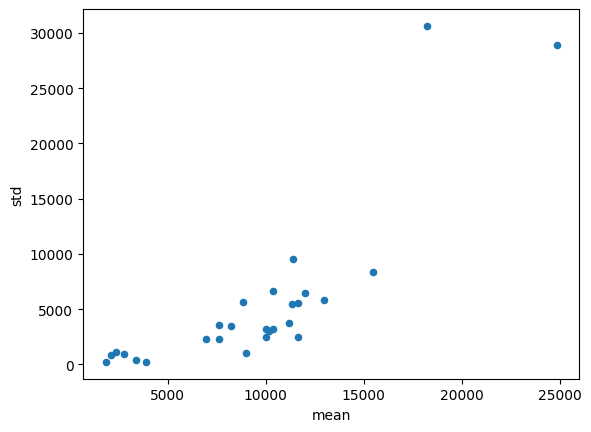

In [40]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_neighborhood.plot.scatter(x="mean", y="std")

## COVID

Recall that created a bar chart comparing the fatality rate between cases in Portugal and Colombia in each age group. Now you'll recreate this plot.

The file `covid_PT_CO_2020-05-28.csv` is the result of the data cleaning steps that we have already done.

- Colombia: added the fatality column and created the age groups
- Combined both data files into one, adding a country column (we also only kept the columns we need for this exercise)

In [9]:
df_covid = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/covid_PT_CO_2020-05-28.csv")
df_covid

,country,fatality,age
0,PT,0,60-69
1,PT,0,60-69
2,PT,0,80+
3,PT,0,60-69
4,PT,0,50-59
...,...,...,...
56957,CO,0,40-49
56958,CO,0,50-59
56959,CO,0,30-39
56960,CO,0,10-19


1\. Create a side-by-side bar chart with age on the horizontal axis, side-by-side bars at each age colored by country, with the heights of bars representing the proportion of cases that result in fatalities, at each age for each country. Hint: first create a Series or DataFrame that contains the information you want.

In [10]:
import matplotlib.pyplot as plt

In [11]:
df_group = df_covid.groupby(["country", "age"])["fatality"].mean()
df_group

country  age  
CO       0-9      0.004525
         10-19    0.000513
         20-29    0.002316
         30-39    0.004274
         40-49    0.015125
         50-59    0.036823
         60-69    0.097909
         70-79    0.191585
         80+      0.278832
PT       0-9      0.000000
         10-19    0.000000
         20-29    0.000243
         30-39    0.000211
         40-49    0.002822
         50-59    0.007995
         60-69    0.035017
         70-79    0.106031
         80+      0.205180
Name: fatality, dtype: float64

<Axes: xlabel='age'>

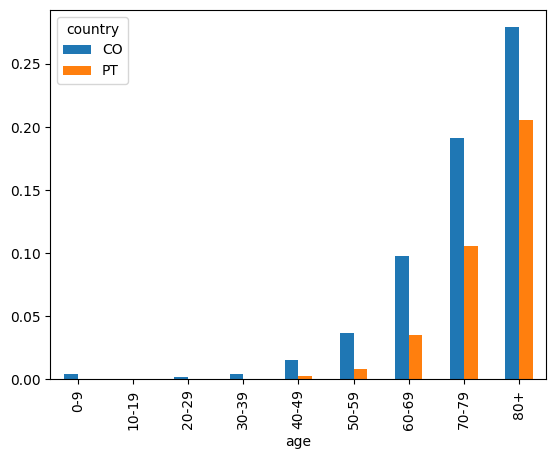

In [45]:
# fig, axes = plt.subplots(1, 2, figsize=(10, 4), sharey=True)
# countries = df_covid["country"].unique()
# for ax, country in zip(axes, countries):
#     (df_group[country].plot.bar(ax=ax))
#     ax.set_title(country)
fatalityprop = df_covid.groupby(["country", "age"])["fatality"].mean()
fatalityprop.unstack(level = "country").plot.bar()

## Penguins

The ["Palmer penguins"](https://allisonhorst.github.io/palmerpenguins/) data set (`penguins.csv`) contains data on a sample of penguins collected at Palmer Station in Antarctica.

In [13]:
df_penguins = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/penguins.csv")

df_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


1\. Compute the correlation between bill length and bill depth for each species. Do this by creating a Series or DataFrame that contains the information.

In [53]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
# correlation between bill length and bill depth for each species
df_penguins.groupby("species")[["bill_length_mm", "bill_depth_mm"]].corr()
# df_penguins[["bill_length_mm", "bill_depth_mm"]].corr()

bill_length_mm  bill_depth_mm
species                                                
Adelie    bill_length_mm        1.000000       0.391492
          bill_depth_mm         0.391492       1.000000
Chinstrap bill_length_mm        1.000000       0.653536
          bill_depth_mm         0.653536       1.000000
Gentoo    bill_length_mm        1.000000       0.643384
          bill_depth_mm         0.643384       1.000000

2\. Create a scatterplot of bill length and bill depth with the points colored by species. (For now, do this manually like in the pre-class notebook reading. We'll see a better way next time.)

<Axes: xlabel='bill_length_mm', ylabel='bill_depth_mm'>

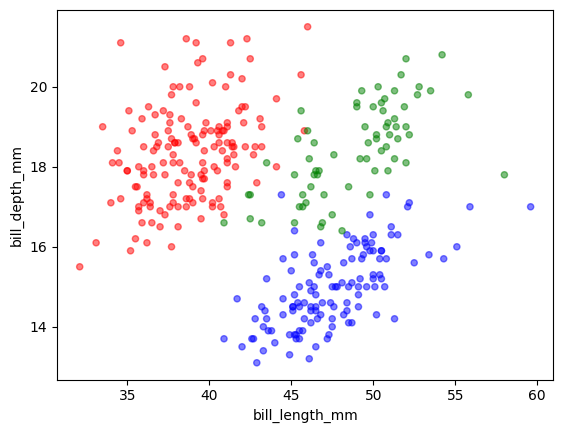

In [15]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
cols = df_penguins["species"].map({
    "Adelie": "red",
    "Chinstrap": "g",
    "Gentoo": "blue"
})
df_penguins.plot.scatter(x="bill_length_mm", y="bill_depth_mm", color=cols, alpha=0.5)

3\. Create a scatterplot of bill length and bill depth faceted by species. (For now, do this manually like in the pre-class notebook reading. We'll see a better way next time.)

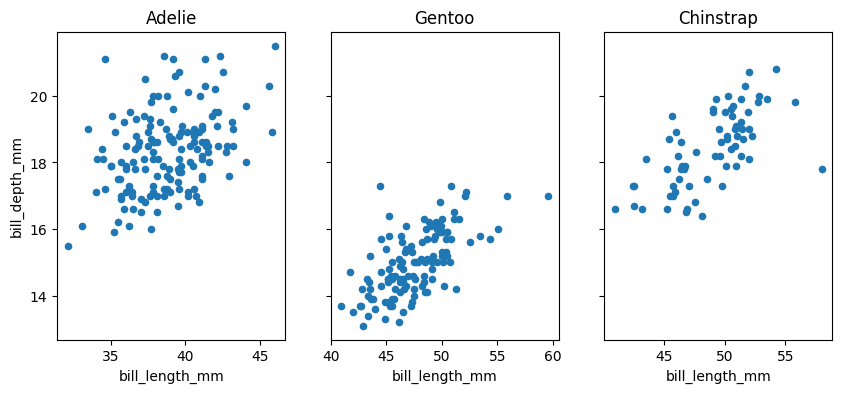

In [16]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
fig, axes = plt.subplots(1, 3, figsize=(10, 4), sharey=True)

species = df_penguins["species"].unique()
for ax, specie in zip(axes, species):
    (df_penguins[df_penguins["species"] == specie].plot.scatter(x="bill_length_mm", y="bill_depth_mm", ax=ax))
    ax.set_title(specie)

## Restaurant Tips Data

The file `tips.csv` is an older data set containing information about dining parties at a restaurant, including the amount of the tips paid to the waiter. Answer the questions below by first creating a Series or DataFrame that contains the relevant information.

In [17]:
df_tips = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/tips.csv")

df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


1\. On which day of the week does the waiter serve the largest parties, on average?

In [18]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_tips.groupby("day")["size"].mean()

day
Fri     2.105263
Sat     2.517241
Sun     2.842105
Thur    2.451613
Name: size, dtype: float64

2\. Calculate the average bill by day and time. What day-time combination has the highest average bill?

In [19]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_day_time = df_tips.groupby(["day", "time"])["total_bill"].mean().unstack()
df_day_time

time,Dinner,Lunch
day,,
Fri,19.663333,12.845714
Sat,20.441379,NaN
Sun,21.410000,NaN
Thur,18.780000,17.664754


3\. Extract the average bill for Friday lunch from the result of Exercise 2.

In [20]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_day_time.loc[["Fri"]]["Lunch"]
# df_tips.groupby(["day", "time"])["total_bill"].mean().iloc[1]

day
Fri    12.845714
Name: Lunch, dtype: float64

4\. Make a visualization comparing the distribution of tip percentages left by males and females. How do they compare?

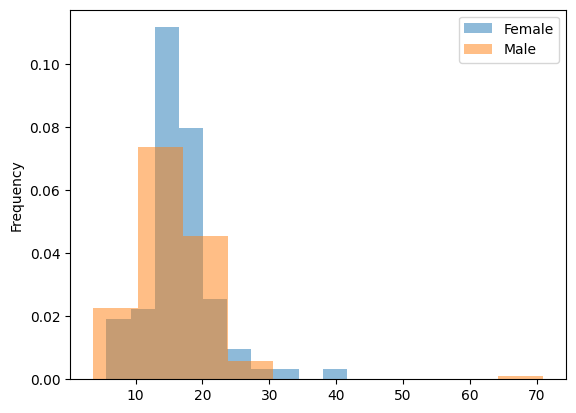

In [80]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_tips["tip_percent"] = df_tips["tip"] / df_tips["total_bill"] * 100
df_tips.groupby("sex")["tip_percent"].plot.hist(
        density=True,
        alpha=0.5,
        legend=True
    )

5\. Make a visualization that shows the average tip percentage as a function of table size.

<Axes: xlabel='size'>

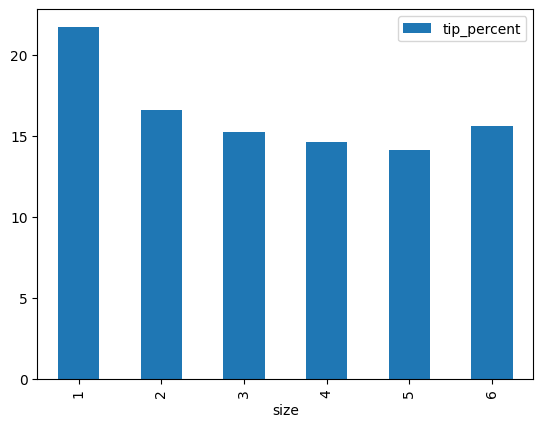

In [62]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
df_tips.groupby("size")[["tip_percent"]].mean().plot.bar()

## Earnings and Height Data

We will use the "Earnings and Height" data from [this website](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/Stock-Watson-EmpiricalExercises-DataSets.htm). Read the [Data Description](https://www.princeton.edu/~mwatson/Stock-Watson_3u/Students/EE_Datasets/Earnings_and_Height_Description.pdf).

You can read in a CSV from here https://raw.githubusercontent.com/kevindavisross/data301/main/data/Earnings_and_Height.csv

In [23]:
df_workers = pd.read_csv("https://raw.githubusercontent.com/kevindavisross/data301/main/data/Earnings_and_Height.csv")

df_workers

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,3,1,84054.75000,65,133,1
1,0,41,6,12,1,2,1,14021.39453,65,155,1
2,0,26,1,16,1,1,1,84054.75000,60,108,1
3,0,37,1,16,1,2,1,84054.75000,67,150,1
4,0,35,6,16,1,1,1,28560.38672,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,1,1,18168.84180,70,150,15
17866,1,44,1,12,2,4,1,84054.75000,74,230,15
17867,1,30,1,12,1,3,1,16081.58789,65,162,15
17868,1,46,3,12,4,4,1,84054.75000,68,190,15


1\. Calculate the average earnings in each region. Which region has the highest average earnings?

Hint: Check the data description for the definition of each region. Your final result should show the region name (not the numerical code).

In [24]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT

def region_to_name(c):
    if c == 1:
        return "Northeast"
    elif c == 2:
        return "Midwest"
    elif c == 3:
        return "South"
    else:
        return "West"


df_workers["region"] = df_workers["region"].map(region_to_name)

df_workers

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,South,1,84054.75000,65,133,1
1,0,41,6,12,1,Midwest,1,14021.39453,65,155,1
2,0,26,1,16,1,Northeast,1,84054.75000,60,108,1
3,0,37,1,16,1,Midwest,1,84054.75000,67,150,1
4,0,35,6,16,1,Northeast,1,28560.38672,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,Northeast,1,18168.84180,70,150,15
17866,1,44,1,12,2,West,1,84054.75000,74,230,15
17867,1,30,1,12,1,South,1,16081.58789,65,162,15
17868,1,46,3,12,4,West,1,84054.75000,68,190,15


In [25]:
df_workers.groupby("region")[["earnings"]].mean()

,earnings
region,
Midwest,46055.435586
Northeast,51124.370744
South,43643.402453
West,48705.823911


<Axes: xlabel='region'>

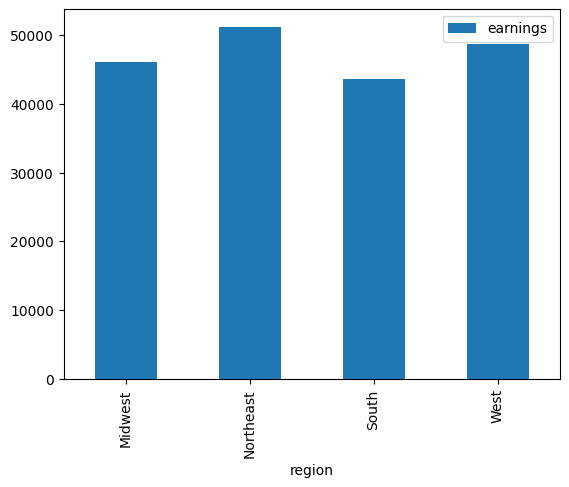

In [63]:
df_workers.groupby("region")[["earnings"]].mean().plot.bar()

2\. Create a plot comparing the distributions of education levels across the races/ethnicities in the data set. What do you notice?

Hint: transform the numerical codes for race/ethnicity to the descriptive name.

In [26]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
def race_to_name(c):
    if c == 1:
        return "non-Hispanic white"
    elif c == 2:
        return "non-Hispanic black"
    elif c == 3:
        return "Hispanic"
    else:
        return "other"


df_workers["race"] = df_workers["race"].map(race_to_name)

df_workers

,sex,age,mrd,educ,cworker,region,race,earnings,height,weight,occupation
0,0,48,1,13,1,South,non-Hispanic white,84054.75000,65,133,1
1,0,41,6,12,1,Midwest,non-Hispanic white,14021.39453,65,155,1
2,0,26,1,16,1,Northeast,non-Hispanic white,84054.75000,60,108,1
3,0,37,1,16,1,Midwest,non-Hispanic white,84054.75000,67,150,1
4,0,35,6,16,1,Northeast,non-Hispanic white,28560.38672,68,180,1
...,...,...,...,...,...,...,...,...,...,...,...
17865,1,47,6,12,1,Northeast,non-Hispanic white,18168.84180,70,150,15
17866,1,44,1,12,2,West,non-Hispanic white,84054.75000,74,230,15
17867,1,30,1,12,1,South,non-Hispanic white,16081.58789,65,162,15
17868,1,46,3,12,4,West,non-Hispanic white,84054.75000,68,190,15


3\. Compare the proportions of workers of each region with more than a high school education (i.e., educ > 13). Which region has the highest rate of higher education?

In [69]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
high_edu = df_workers[df_workers["educ"] > 13].groupby("region")["cworker"].mean()
high_edu

region
Midwest      2.035024
Northeast    2.130460
South        2.140049
West         2.199183
Name: cworker, dtype: float64

4\. Create a plot comparing the distribution of earnings of workers who are at least 6 feet tall with that of workers who are under 6 feet tall. Also compute and compare appropriate summary statistics.

In [83]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT
def over_6(h):
    if h >= 72:
        return "over_6"
    else:
        return "under_6"
df_workers["over_6?"] = df_workers["height"].map(over_6)
df_workers
df_tips.groupby("sex")["tip_percent"].plot.hist(
        density=True,
        alpha=0.5,
        legend=True
    )


ValueError: Cannot set a DataFrame with multiple columns to the single column over_6

5\. Repeat the previous part, but only for females.

In [ ]:
# YOUR CODE HERE. ADD AS MANY CELLS AS YOU WANT